In [3]:
import pandas as pd

sel= pd.read_excel('./샘플링데이터위도경도표시.xlsx')
sel

,Unnamed: 0,업종,가게이름,평가점수,평가인원,리뷰갯수,주소,Latitude,Longitude,전화,영업시간,링크주소
0,20384,일식,아라키,0.0,0,0,서울 중구 을지로5길 19,37.566921,126.983964,02-6353-8578,NaN,https://place.map.kakao.com/865059627#review
1,7924,"족발,보쌈",위대한족보,3.8,5,20,서울 중랑구 답십리로77길 11 1층,37.572089,127.081440,02-438-8008,"월,수,목,금,토,일 14:00 ~ 00:00",https://place.map.kakao.com/99546281#review
2,16890,국수,마루칼국수,4.7,3,1,서울 용산구 두텁바위로1길 42,37.546123,126.974486,02-3789-2630,NaN,https://place.map.kakao.com/248675031#review
3,15547,한식,먹쇠집,4.8,4,3,서울 종로구 종로 297-3,37.571978,127.010776,02-741-1426,NaN,https://place.map.kakao.com/9763716#review
4,5772,카페,카페더로비,3.9,10,34,서울 도봉구 방학로 171-5,37.661988,127.033254,02-954-1715,화~일 11:00 ~ 23:00,https://place.map.kakao.com/447862448#review
...,...,...,...,...,...,...,...,...,...,...,...,...
891,7002,냉면,혜화면옥,3.1,18,25,서울 성북구 보문로 193-1,37.590818,127.013917,02-921-3451,매일 11:00 ~ 22:00,https://place.map.kakao.com/26481780#review
892,2610,"돈까스,우동",신온누리에 생돈까스전문점 대방점,1.7,56,85,서울 동작구 여의대방로24길 107,37.499147,126.925928,02-823-8589,매일 10:30 ~ 21:00,https://place.map.kakao.com/11832450#review
893,21111,양식,파스타미샤,0.0,0,0,서울 종로구 창덕궁길 59,37.580135,126.989144,NaN,NaN,https://place.map.kakao.com/1469768429#review
894,5339,"호프,요리주점",지금보고싶다,3.0,2,38,서울 관악구 남현3길 74,37.475305,126.980670,NaN,NaN,https://place.map.kakao.com/19959503#review


In [4]:
sel['평가점수'].mean()

3.170647321428575

In [5]:
jm=(sel['평가점수']>=3.17)&(sel['업종']=='치킨') # 평가 점수가 평균보다 높은 경우

In [6]:
sj=sel[jm]
sj.head(1)

,Unnamed: 0,업종,가게이름,평가점수,평가인원,리뷰갯수,주소,Latitude,Longitude,전화,영업시간,링크주소
32,20663,치킨,훌랄라숯불치킨 당산역점,5.0,1,0,서울 영등포구 선유동2로 73,37.535079,126.898442,02-2671-9977,영업시간 월~토 16:00 ~ 24:00,https://place.map.kakao.com/394972486#review


# 평균  평가점수 보다 높은 가게 위치

In [8]:

import pandas as pd
import folium as g


# 기준이 될 장소 선정
sample_map = g.Map(location = [37.55,126.98],
              tiles='Stamen Terrain',
              zoom_start =12)

for name ,lat,lng in zip(sj['가게이름'],sj['Latitude'],sj['Longitude']):
    g.Marker([lat,lng],
            popup=name,
            icon=g.Icon(color='red',icon='star')).add_to(sample_map)
    
sample_map

In [11]:
jm1=(sel['평가점수']<=3.17)&(sel['업종']=='치킨')

In [12]:
sj1=sel[jm1]
sj1.head(1)

,Unnamed: 0,업종,가게이름,평가점수,평가인원,리뷰갯수,주소,Latitude,Longitude,전화,영업시간,링크주소
22,17135,치킨,BHC치킨 녹번역점,2.3,9,1,서울 은평구 은평로 229 2층,37.601236,126.933232,02-388-9282,매일 12:00 ~ 24:00,https://place.map.kakao.com/1226340201#review


# 평가기준 높은 집은 초록색 낮은 집은 빨간색

In [13]:
sj.columns

Index(['Unnamed: 0', '업종', '가게이름', '평가점수', '평가인원', '리뷰갯수', '주소', 'Latitude',
       'Longitude', '전화', '영업시간', '링크주소'],
      dtype='object')

# 치킨 평가점수 평균에 따른 지도 시각화 결론

In [14]:
import pandas as pd
import folium as g 
# folium 설치전에 prompt에서 pip install folium 해주세요


# 평가 점수 평균 : 3.17
# sj1 이 평균보다 낮은곳
# sj가 평균보다 높은곳

# 기준이 될 장소 선정
sample_map = g.Map(location = [37.55,126.98],
              tiles='Stamen Terrain',
              zoom_start =12)

for name ,lat,lng,sc,man,rev,time in zip(sj1['가게이름'],sj1['Latitude'],sj1['Longitude'],sj1['평가점수'],sj1['평가인원'],sj1['리뷰갯수'],sj1['영업시간']):
    g.Marker([lat,lng],
            popup=('<pre><i>',"가게이름:"+name,"평가점수:"+str(sc),"평가인원:"+str(man),
                   "리뷰갯수:"+str(rev),"영업시간:"+str(time),'</i></pre>'), 
            tooltip=sc, #평가점수 보임
            icon=g.Icon(color='red',icon='star')).add_to(sample_map)
    
    for name,lat,lng,sc,man,rev,time in zip(sj['가게이름'],sj['Latitude'],sj['Longitude'],sj['평가점수'],sj['평가인원'],sj['리뷰갯수'],sj['영업시간']):
        g.Marker([lat,lng],
            popup=('<pre><i>',"가게이름:"+name,"평가점수:"+str(sc),"평가인원:"+str(man), # pre 로 글자를 가로로 출력 i로 글자체 변경
                   "리뷰갯수:"+str(rev),"영업시간:"+str(time),'</i></pre>'),             
            tooltip=sc,
            icon=g.Icon(color='green',icon='star')).add_to(sample_map)
sample_map

In [20]:

# 시각화 모듈 임포트 

import matplotlib.pyplot as plt 
import seaborn as sns 


# jupyter notebook 내 그래프를 바로 그리기 위한 설정 
%matplotlib inline  
#속도빠르게하기위한건데 고려해볼필요있음

# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지) 
plt.rcParams['axes.unicode_minus'] = False

In [21]:
# 한글 깨짐 방지

plt.rcParams['font.family'] = 'NanumGothic'

In [22]:
import matplotlib.font_manager as fm 

# 설치된 폰트 출력 
font_list = [font.name for font in fm.fontManager.ttflist] 
font_list

['DejaVu Sans',
 'STIXSizeThreeSym',
 'cmmi10',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'DejaVu Serif Display',
 'DejaVu Sans Mono',
 'STIXSizeFourSym',
 'STIXGeneral',
 'STIXSizeOneSym',
 'STIXSizeFiveSym',
 'DejaVu Sans Mono',
 'STIXSizeFourSym',
 'STIXGeneral',
 'STIXNonUnicode',
 'cmr10',
 'STIXNonUnicode',
 'STIXSizeThreeSym',
 'STIXGeneral',
 'DejaVu Sans',
 'DejaVu Serif',
 'cmtt10',
 'STIXNonUnicode',
 'DejaVu Serif',
 'STIXSizeTwoSym',
 'DejaVu Sans',
 'cmb10',
 'STIXNonUnicode',
 'STIXSizeTwoSym',
 'DejaVu Sans Mono',
 'cmex10',
 'DejaVu Serif',
 'cmsy10',
 'STIXSizeOneSym',
 'STIXGeneral',
 'cmss10',
 'DejaVu Serif',
 'DejaVu Sans Display',
 'Haan Wing2',
 'Segoe UI Symbol',
 'Kozuka Gothic Pro',
 'Adobe Garamond Pro',
 'Leelawadee UI',
 'Sitka Small',
 'Kozuka Mincho Pro',
 'Kozuka Mincho Pro',
 'Adobe Caslon Pro',
 'Malgun Gothic',
 'Myriad Pro',
 'Adobe Caslon Pro',
 'Arno Pro',
 'Consolas',
 'Nueva Std',
 'Consolas',
 'Tahoma',
 'New Gulim',
 'Sylfaen',
 'Microsoft JhengHe

In [23]:
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
%config InlineBackend.figure_format='retina' # 그래프 글씨 뚜렷

#  그래프 참고 사이트
https://hyemin-kim.github.io/2020/07/03/S-Python-Seaborn1/

<AxesSubplot:xlabel='평가점수', ylabel='가게이름'>

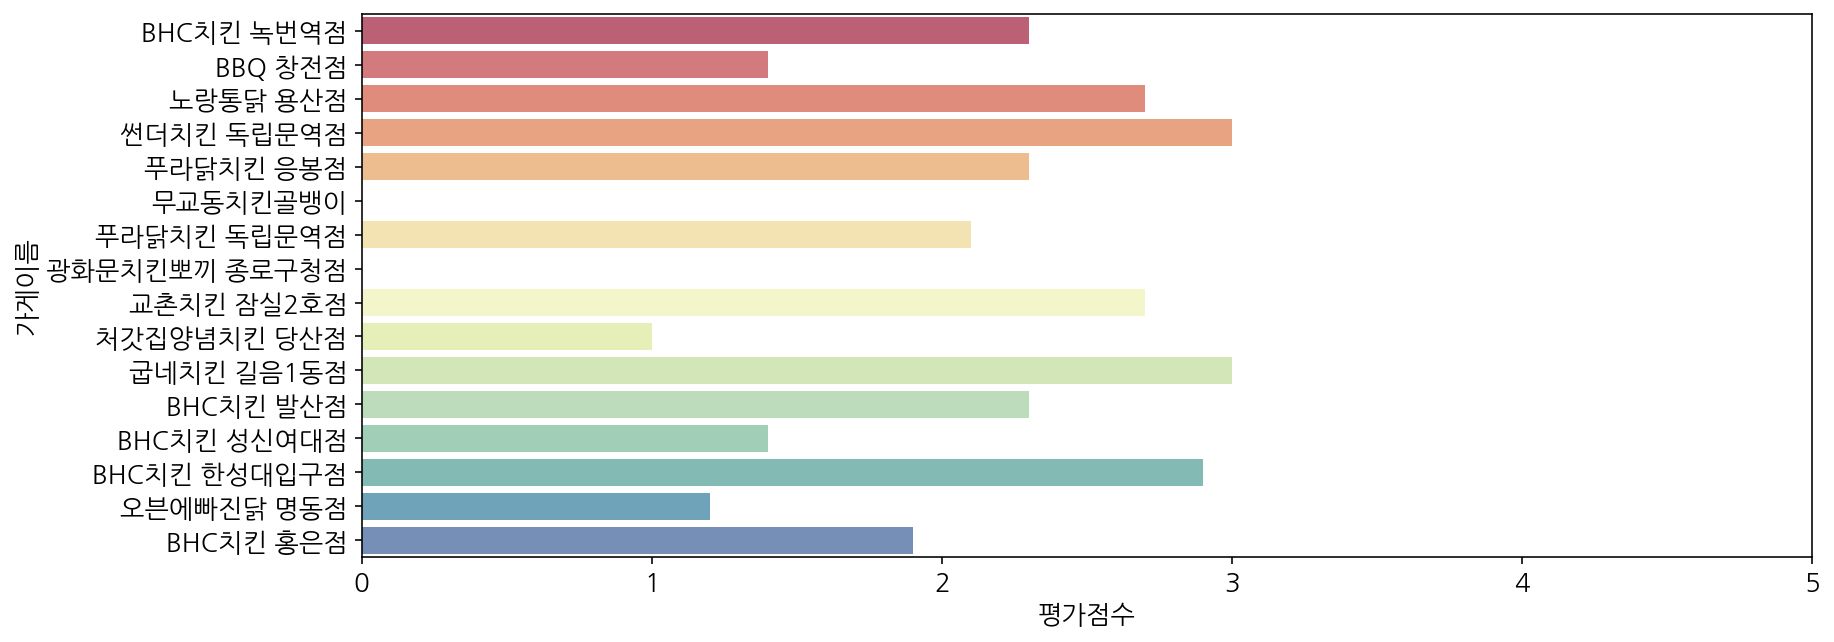

In [64]:
# sj1 이 평균보다 낮은곳
# sj가 평균보다 높은곳

import warnings
warnings.filterwarnings('ignore') #경고메시지가 뜹니다~

x1 = sj1['가게이름']
y1 = sj1['평가점수']

x = sj['가게이름']
y = sj['평가점수']

plt.figure(figsize=(13, 5)) 
plt.rcParams['figure.figsize'] = (13, 8)# figsize 를 전역으로 설정 
plt.xlim(0.0,5.0)
plt.rcParams['font.size'] = 13 # font 크기 조절 

sns.barplot(y1,x1,alpha=0.8,palette="Spectral")# 평균보다 낮은곳 기준3.17



<AxesSubplot:xlabel='평가점수', ylabel='가게이름'>

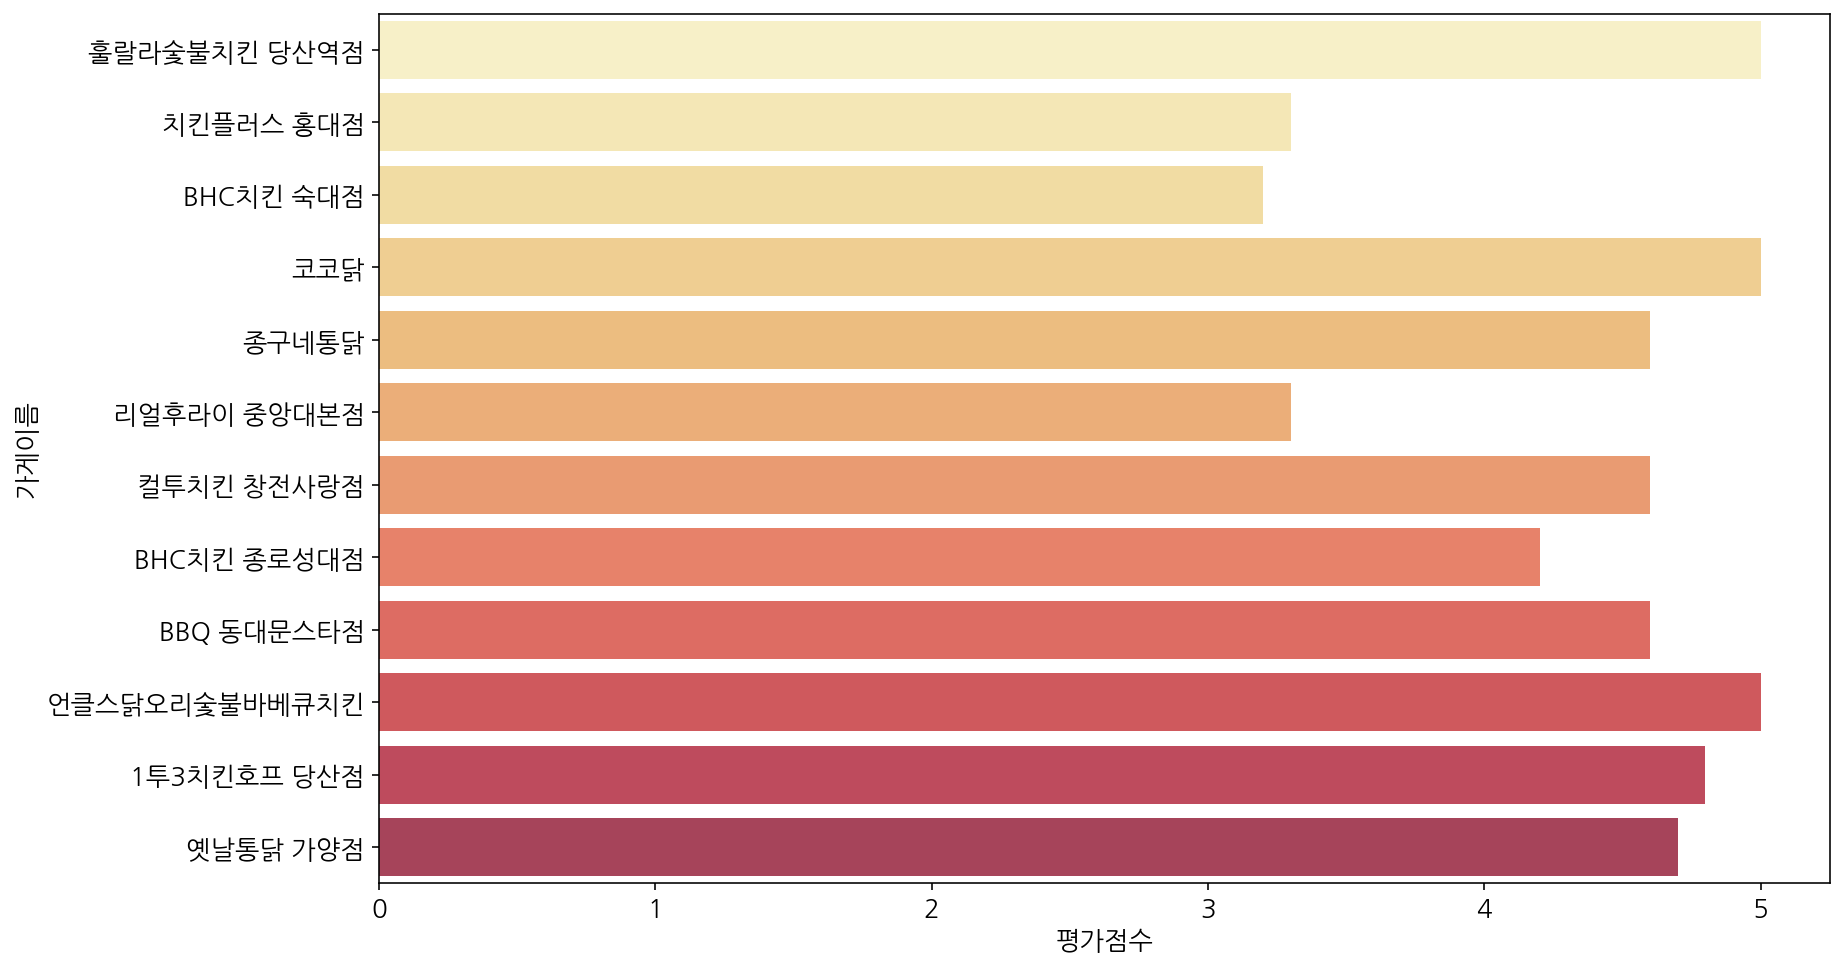

In [65]:
sns.barplot(y,x,alpha =0.8,palette='YlOrRd') #평가 점수보다 높은곳 기준3.17

<AxesSubplot:xlabel='평가인원', ylabel='가게이름'>

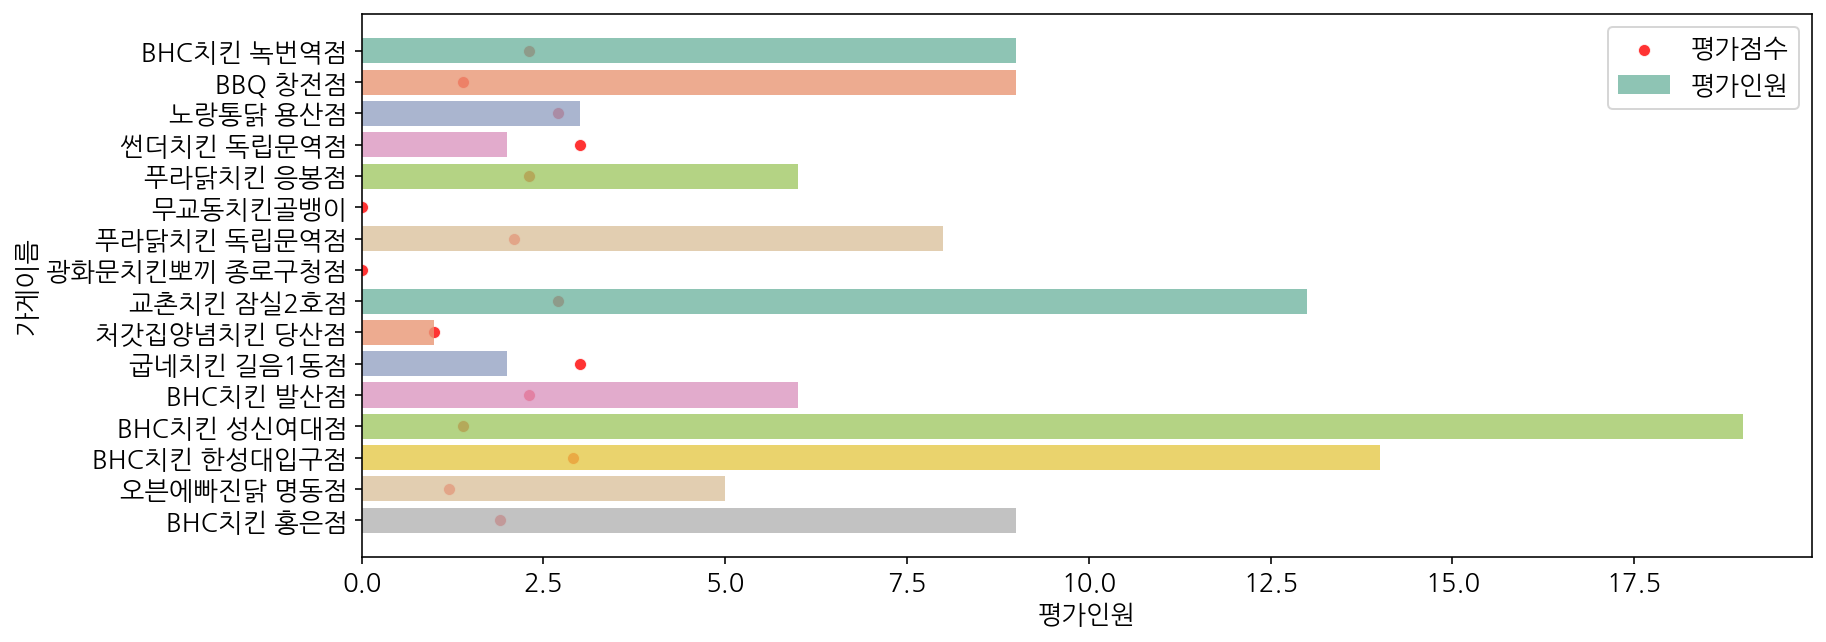

In [102]:
# sj1 이 평균보다 낮은곳
# sj가 평균보다 높은곳

import warnings
warnings.filterwarnings('ignore') #경고메시지가 뜹니다~

x1 = sj1['가게이름']
y1 = sj1['평가인원']

y2= sj1['평가점수']
plt.figure(figsize=(13, 5)) 
plt.rcParams['figure.figsize'] = (13, 8)# figsize 를 전역으로 설정 
#plt.xlim(0.0,5.0)
plt.rcParams['font.size'] = 13 # font 크기 조절 

sns.barplot(y1,x1,alpha=0.8,palette="Set2",label='평가인원')# 평균보다 낮은곳 기준3.17

sns.scatterplot(y2,x1,alpha=0.8,color="Red",label='평가점수') # 평가에 참여한 인원


<AxesSubplot:xlabel='평가인원', ylabel='가게이름'>

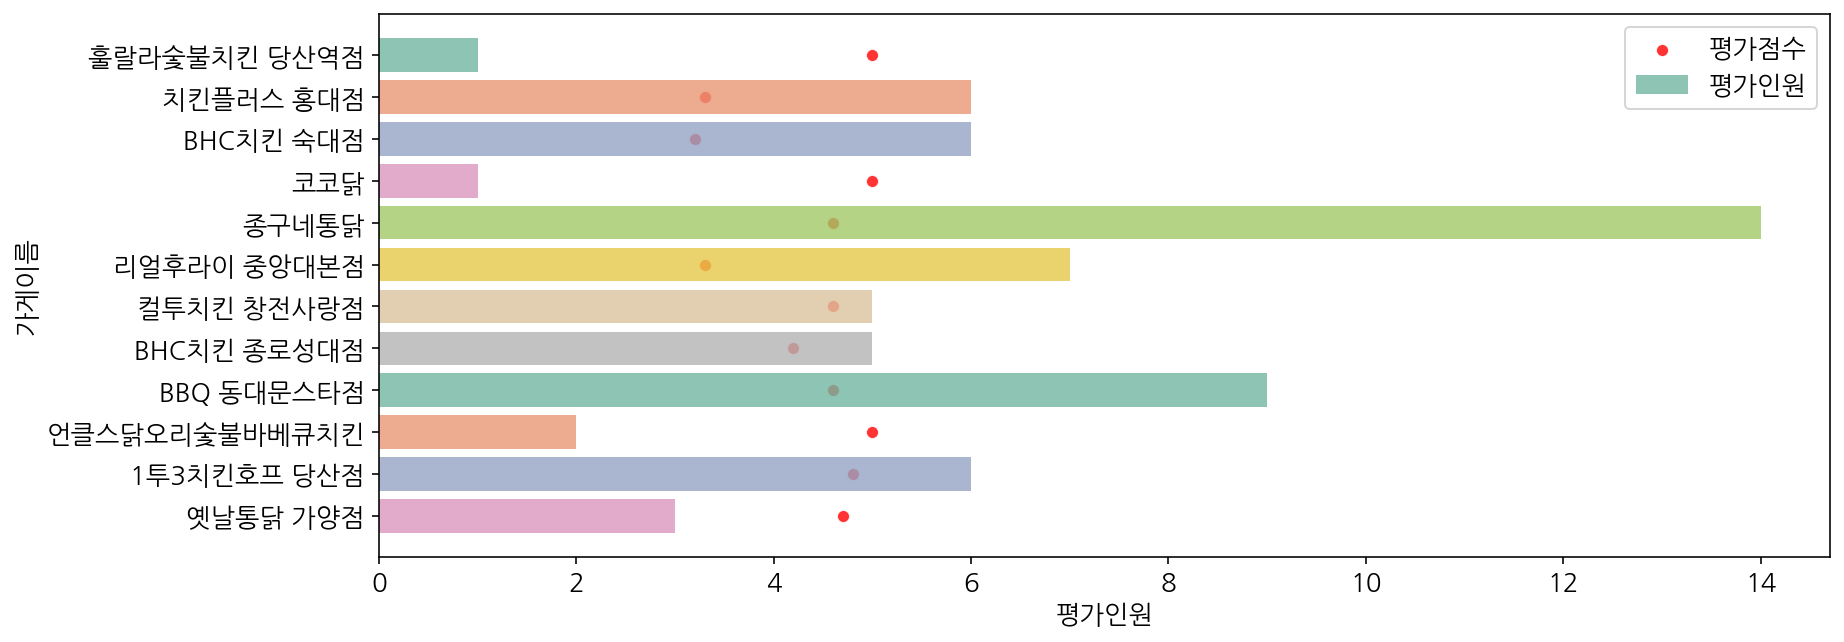

In [103]:
x = sj['가게이름']
y = sj['평가인원']

y3= sj['평가점수']

plt.figure(figsize=(13, 5)) 
plt.rcParams['figure.figsize'] = (13, 8)# figsize 를 전역으로 설정 
#plt.xlim(0.0,5.0)
plt.rcParams['font.size'] = 13 # font 크기 조절 

sns.barplot(y,x,alpha=0.8,palette="Set2",label='평가인원')# 평균보다 낮은곳 기준3.17

sns.scatterplot(y3,x,alpha=0.8,color="Red",label='평가점수') # 평가에 참여한 인원
